In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd

sys.path.append('..')

from gojo import plotting
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
# load test dataset (Wine)
wine_dt = datasets.load_wine()
data = StandardScaler().fit_transform(wine_dt['data'])
PCs = PCA(n_components=2).fit_transform(data)
PCs = pd.DataFrame(PCs, columns=['PC1', 'PC2'])
PCs['target'] = wine_dt['target']

In [17]:
PCs

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


In [10]:
import matplotlib.pyplot as plt
import matplotlib  as mpl

# internal deps
from gojo.util.validation import checkMultiInputTypes

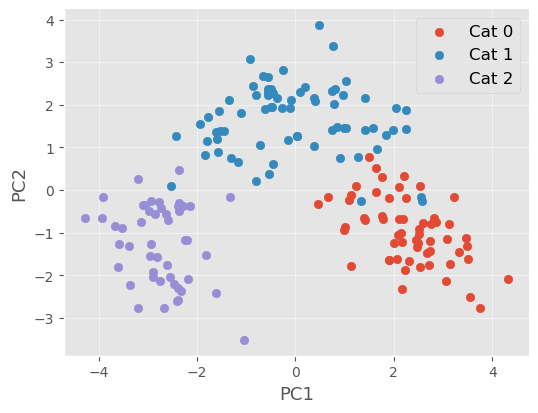

In [57]:
def scatterPlot(
    df: pd.DataFrame,
    x: str,
    y: str,
    hue: str = None,
    hue_mapping: dict = None,
    ax: mpl.axes.Axes = None,
    figsize: tuple = (6, 4.5),
    style: str = 'ggplot',
    dpi: int = 100,
    maker_size: float or int = None,
    colors: list or str = None,
    title: str = '',
    title_size: int or float = 15,
    title_pad: int = 15,
    hide_legend: bool = False,
    legend_pos: str = 'upper right',
    legend_size: int or float = 12,
    xlabel_size: float or int = 13,
    ylabel_size: float or int = 13,
    grid_alpha: float = 0.5,
    yvmin: float = None,
    yvmax: float = None,
    xvmin: float = None,
    xvmax: float = None,
    save: str = None,
    save_kw: dict = None,
    show: bool = True
):
    """ Description """
    checkMultiInputTypes(
        ('df', df, [pd.DataFrame]),
        ('x', x, [str]),
        ('y', y, [str]),
        ('hue', hue, [str, type(None)]),
        ('hue_mapping', hue_mapping, [dict, type(None)]),
        ('ax', ax, [mpl.axes.Axes, type(None)]),
        ('figsize', figsize, [tuple]),
        ('style', style, [str]),
        ('dpi', dpi, [int]),
        ('maker_size', maker_size, [int, float, type(None)]),
        ('colors', colors, [list, str, type(None)]),
        ('title', title, [str]),
        ('title_size', title_size, [int, float]),
        ('title_pad', title_pad, [int, float]),
        ('hide_legend', hide_legend, [bool]),
        ('legend_pos', legend_pos, [str]),
        ('legend_size', legend_size, [int, float]),
        ('xlabel_size', xlabel_size, [int, float]),
        ('ylabel_size', ylabel_size, [int, float]),
        ('grid_alpha', grid_alpha, [float]),
        ('yvmin', yvmin, [float, type(None)]),
        ('yvmax', yvmax, [float, type(None)]),
        ('xvmin', xvmin, [float, type(None)]),
        ('xvmax', xvmax, [float, type(None)]),
        ('save', save, [str, type(None)]),
        ('save_kw', save_kw, [dict, type(None)]),
        ('show', show, [bool]))
    
    
    # check x, y and (optionally) hue variables
    if x not in df.columns:
        raise TypeError('Missing "x" variable "%s". Available variables are: %r' % (x, list(df.columns)))

    if y not in df.columns:
        raise TypeError('Missing "y" variable "%s". Available variables are: %r' % (y, list(df.columns)))

    if hue is not None:
        if hue not in df.columns:
            raise TypeError('Missing "hue" variable "%s". Available variables are: %r' % (hue, list(df.columns)))

            
    # avoid inplace modifications
    df = df.copy()
    
    # rename hue if hue_mapping is provided
    if not (hue is None or hue_mapping is None):
        df[hue] = df[hue].apply(lambda v: hue_mapping.get(v, v))

    # get the number of levels
    n_labels = 1
    hue_levels = [None]
    if hue is not None:
        n_labels = len(df[hue].unique())
        hue_levels = df[hue].unique()
    
    if isinstance(colors, str):
        cmap = plt.get_cmap(colors, n_labels+1)
        colors = [mpl.colors.to_hex(cmap(i)) for i in range(n_labels)]
        
    with plt.style.context(style):
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)
            fig.set_dpi(dpi)
            
        for i in range(n_labels):
            # select color (if specified)
            color = None if colors is None else colors[i]
            
            # separate the data to represent
            if hue is not None:
                df_i = df.loc[df[hue] == hue_levels[i]]
            else:
                df_i = df
            
            ax.scatter(
                df_i[x].values, 
                df_i[y].values, 
                label=hue_levels[i],
                s=maker_size,
                color=color)
            
        # set legend
        if not hide_legend and hue is not None:
            ax.legend(loc=legend_pos, prop=dict(size=legend_size))
        
        # set axis limits
        ax.set_ylim(bottom=yvmin, top=yvmax)
        ax.set_xlim(left=xvmin, right=xvmax)
        
        # figure layout
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(alpha=grid_alpha)
        ax.set_xlabel(x, size=xlabel_size)
        ax.set_ylabel(y, size=ylabel_size)
        ax.set_title(title, size=title_size, pad=title_pad)
        
        # save figure if specified
        if save:
            save_kw = {} if save_kw is None else save_kw
            plt.savefig(save, **save_kw)

        if show:
            plt.show()
            
scatterPlot(
    df=PCs,
    x='PC1',
    y='PC2',
    hue='target',
    hue_mapping={0: 'Cat 0', 1: 'Cat 1', 2: 'Cat 2'}
)